## Other than the obvious tasks of producing visual representations of the data, as decreed by the assignment, these are components that are even more important for me:

1. continual use and practice of Graphlab Create
2. use of seaborn to replace the standard esthetics of matplotlib

In [197]:
import graphlab as gl
import graphlab.aggregate as agg

#gl.product_key.set_product_key('6E19-9A71-9128-0AD3-AA0C-8C21-8919-1180')

gl.canvas.set_target('ipynb') # output a single GraphLab Canvas view to a IPython Notebook cell

import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [198]:
sf = gl.SFrame.read_csv('./data/sanfrancisco_incidents_summer_2014.csv')
#sea = gl.SFrame.read_csv('data/seattle_incidents_summer_2014.csv')

PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/data/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.365855 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/data/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 28993 lines in 0.237816 secs.


In [199]:
sf.column_names()

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

___
### Let's get a quick overlook of the SF crime statistics

In [11]:
sf

Columns:
	IncidntNum	int
	Category	str
	Descript	str
	DayOfWeek	str
	Date	str
	Time	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	float
	Y	float
	Location	str
	PdId	int

Rows: 28993

Data:
+------------+-----------------------------+-------------------------------+
| IncidntNum |           Category          |            Descript           |
+------------+-----------------------------+-------------------------------+
| 140734311  |            ARSON            |       ARSON OF A VEHICLE      |
| 140736317  |         NON-CRIMINAL        |         LOST PROPERTY         |
| 146177923  |        LARCENY/THEFT        |  GRAND THEFT FROM LOCKED AUTO |
| 146177531  |        LARCENY/THEFT        |  GRAND THEFT FROM LOCKED AUTO |
| 140734220  |         NON-CRIMINAL        |         FOUND PROPERTY        |
| 140734349  |        DRUG/NARCOTIC        |    POSSESSION OF MARIJUANA    |
| 140734349  |        DRUG/NARCOTIC        | POSSESSION OF CONTROLLED S... |
| 140734349  | DRIVING UNDER THE INFLUENCE | DRIVING WHILE UNDER THE IN... |
| 140738147  |        OTHER OFFENSES       | EVADING A POLICE OFFICER R... |
| 140734258  |           TRESPASS          |          TRESPASSING          |
+------------+-----------------------------+-------------------------------+
+-----------+------------+-------+------------+----------------+
| DayOfWeek |    Date    |  Time | PdDistrict |   Resolution   |
+-----------+------------+-------+------------+----------------+
|   Sunday  | 08/31/2014 | 23:50 |  BAYVIEW   |      NONE      |
|   Sunday  | 08/31/2014 | 23:45 |  MISSION   |      NONE      |
|   Sunday  | 08/31/2014 | 23:30 |  SOUTHERN  |      NONE      |
|   Sunday  | 08/31/2014 | 23:30 |  RICHMOND  |      NONE      |
|   Sunday  | 08/31/2014 | 23:23 |  RICHMOND  |      NONE      |
|   Sunday  | 08/31/2014 | 23:13 |  SOUTHERN  | ARREST, BOOKED |
|   Sunday  | 08/31/2014 | 23:13 |  SOUTHERN  | ARREST, BOOKED |
|   Sunday  | 08/31/2014 | 23:13 |  SOUTHERN  | ARREST, BOOKED |
|   Sunday  | 08/31/2014 | 23:00 | INGLESIDE  |      NONE      |
|   Sunday  | 08/31/2014 | 23:00 |  CENTRAL   | ARREST, CITED  |
+-----------+------------+-------+------------+----------------+
+---------------------------+----------------+---------------+
|          Address          |       X        |       Y       |
+---------------------------+----------------+---------------+
| LOOMIS ST / INDUSTRIAL ST | -122.405646995 | 37.7383221869 |
|   400 Block of CASTRO ST  | -122.435012094 | 37.7617677183 |
|  1000 Block of MISSION ST | -122.409795195 | 37.7800356268 |
|    FULTON ST / 26TH AV    | -122.485262988 | 37.7725176473 |
|  800 Block of LA PLAYA ST | -122.509895418 | 37.7723131977 |
|     11TH ST / MINNA ST    | -122.416578493 | 37.7739070745 |
|     11TH ST / MINNA ST    | -122.416578493 | 37.7739070745 |
|     11TH ST / MINNA ST    | -122.416578493 | 37.7739070745 |
|  1400 Block of DOLORES ST | -122.424497945 | 37.7466488718 |
|   900 Block of MASON ST   | -122.410845624 | 37.7923158748 |
+---------------------------+----------------+---------------+
+-------------------------------+----------------+
|            Location           |      PdId      |
+-------------------------------+----------------+
| (37.7383221869053, -122.40... | 14073431126031 |
| (37.7617677182954, -122.43... | 14073631771000 |
| (37.7800356268394, -122.40... | 14617792306244 |
| (37.7725176473142, -122.48... | 14617753106244 |
| (37.7723131976814, -122.50... | 14073422072000 |
| (37.773907074489, -122.416... | 14073434916010 |
| (37.773907074489, -122.416... | 14073434916662 |
| (37.773907074489, -122.416... | 14073434965050 |
| (37.7466488718366, -122.42... | 14073814727175 |
| (37.7923158747647, -122.41... | 14073425827195 |
+-------------------------------+----------------+
[28993 rows x 13 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### The tool makes it easy to see how the crime incidents spread across different PD districts.  But we are going to do things the hard way by exacting the data and plot it 

In [114]:
sf_PdDistrict = sf.groupby(["PdDistrict"], {'Counts':gl.aggregate.COUNT()}).sort('Counts', ascending=False)

In [115]:
min=sf_PdDistrict['Counts'].min()
sf_PdDistrict['normalized']=sf_PdDistrict['Counts'].apply(lambda x: float(x)/min).apply(lambda x: round(x, 2))

In [116]:
sf_PdDistrict.sort('normalized', ascending=False)
sf_PdDistrict['normalized']

dtype: float
Rows: 10
[3.71, 2.39, 2.32, 2.27, 1.76, 1.54, 1.46, 1.2, 1.1, 1.0]

## Categories of Crime by PdDistrict

While Figure 1 shows a nice summary of the total number of reported crimes by PdDistrict.  I think it would be interesteing to also find out exactly what the top 5 categories are in each PdDistrict and what proportions they occupy.

So.

We need to:

1. arrange by PdDistrict and then by Category
2. select only the top 5 categories and group the incidents from remaining categories into one bucket called Others
3. plot the bar chart like Figure 1 but each bar would have different colors showing different categories
4. sort in such way that the top category will be at the highest position on the bar stack.


### 1. Arrange by PdDistrict and then by Category

In [156]:
# 1. arrange by PdDistrict and then by Category

sf_PdDistrict_pd = sf.groupby(["PdDistrict",'Category'], {'Counts':gl.aggregate.COUNT()}).sort('Counts', ascending=False)

#
# convert SFrame to a Pandas DF so we can utilize the plotting utils
#
#sf_PdDistrict_pd = gl.SFrame.to_dataframe(sf_PdDistrict_pd)
sf_PdDistrict_pd

Columns:
	Category	str
	PdDistrict	str
	Counts	int

Rows: 265

Data:
+----------------+------------+--------+
|    Category    | PdDistrict | Counts |
+----------------+------------+--------+
| LARCENY/THEFT  |  SOUTHERN  |  2562  |
| LARCENY/THEFT  |  CENTRAL   |  1574  |
| LARCENY/THEFT  |  NORTHERN  |  1499  |
| LARCENY/THEFT  |  MISSION   |  671   |
|  NON-CRIMINAL  |  SOUTHERN  |  639   |
| LARCENY/THEFT  |    PARK    |  576   |
| LARCENY/THEFT  | INGLESIDE  |  548   |
| LARCENY/THEFT  |  TARAVAL   |  547   |
| OTHER OFFENSES |  SOUTHERN  |  543   |
|    ASSAULT     |  SOUTHERN  |  528   |
+----------------+------------+--------+
[265 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### I found the top 5 categories and the remaining for all PdDistricts here 

and put them into a new SF called counts_sf

In [296]:
# Create an empty pandas DF
#
counts_sf = gl.SFrame()
sfpd = sf_PdDistrict['PdDistrict']

for p in sfpd:
    this_p = sf_PdDistrict_pd.filter_by(p, 'PdDistrict').sort('Counts', ascending=False)
    top5 = this_p.head(5)
    not_top5 = this_p['Counts'][5:len(this_p)].sum()
    other = gl.SFrame({'Category': ["OTHER"], 'PdDistrict': [p], 'Counts': [not_top5]})
    top5 = top5.append(other)
    counts_sf = counts_sf.append(top5)

counts_sf['Category'].unique()

dtype: str
Rows: 10
['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'OTHER OFFENSES', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'OTHER', 'WARRANTS']

In [343]:
# Reduce the category variation of sf to what's in top_crimes

sf2 = sf

# Hacking it by hand... Can't work out this SFrame->SArray->list element removal

#True if x % 2 == 0 else False
#sf[sf['id'].apply(lambda x: math.log(x) <= 1)]

def changecrime(crime):
    top_crimes = ['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS']
 
    if crime in top_crimes:
        return crime
    else:
        return "OTHER OFFENSES"

sf2['Category'] = sf2['Category'].apply(changecrime)
#sf2[sf2['Category'].apply(lambda x: x if x in top_crimes else "OTHER OFFENSES")]

sf2g = sf2.groupby('Category', {'Counts': agg.COUNT()}).sort('Counts', ascending=False)
sf2g
larceny = sf2[sf2['Category'] == "LARCENY/THEFT"]

llcool = larceny.groupby("PdDistrict", {'Counts': agg.COUNT()})
pdl = llcool.to_dataframe()
pdl.set_index(pdl['PdDistrict'])

top_crimes = ['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS']

pdsf2 = pd.DataFrame(index=sfpd)
pdsf2 = pdsf2.sort(ascending=False)

/Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [341]:
top_crimes = ['OTHER OFFENSES','VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS']

total = sf2.groupby("PdDistrict", {"TOTAL": agg.COUNT()}).sort('PdDistrict', ascending=False)
df_topcrimes = total.to_dataframe()
   
for crime in top_crimes:
    col = sf2[sf2['Category'] == crime].groupby("PdDistrict", {crime: agg.COUNT()}).sort('PdDistrict', ascending=False)
    pdcol = col.to_dataframe()
    pdcol.set_index(pdcol['PdDistrict'])
    pdcol
    df_topcrimes.loc[:,crime] = pdcol

#pdsf2 = pdsf2.sort_values("TOTAL", ascending=False)
df_topcrimes=df_topcrimes.sort_values("TOTAL", ascending=False)


In [349]:
from bokeh.charts import Bar, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.palettes import Spectral10
import pandas as pd


bar = Bar(df_topcrimes,
          values=blend('OTHER OFFENSES','VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS', name='Incidents', labels_name='Incident'),
          label=cat(columns='PdDistrict', sort=False),
          stack=cat(columns='Incident', sort=False),
          color=color(columns='Incident', palette=Spectral10, sort=False),
          legend='top_right',
          title="Crime Indident by PdDistrict",
          tooltips=[('Type: ', '@Incident')],
          plot_width = 900, plot_height=600
         )

output_notebook()
show(bar)

BokehJS successfully loaded.

In [227]:
# Need to overwrite the existing numberical index with the PdDistrict
# It's easier to do so after you have done the SFrame->DF conversion
#
counts_pd = gl.SFrame.to_dataframe(counts_sf)

counts_pd = counts_pd.set_index(counts_pd['PdDistrict'])

# Necessary step otherwise...  You'll see if you don't add this step
#
counts_pd.index.name=None
counts_pd

# Structure a DF w/ columnar data format 

# s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

index = counts_sf['PdDistrict'].unique()
counts_sf

Columns:
	Category	str
	PdDistrict	str
	Counts	int

Rows: 60

Data:
+----------------+------------+--------+
|    Category    | PdDistrict | Counts |
+----------------+------------+--------+
| LARCENY/THEFT  |  SOUTHERN  |  2562  |
|  NON-CRIMINAL  |  SOUTHERN  |  639   |
| OTHER OFFENSES |  SOUTHERN  |  543   |
|    ASSAULT     |  SOUTHERN  |  528   |
|    WARRANTS    |  SOUTHERN  |  331   |
|     OTHER      |  SOUTHERN  |  1136  |
| LARCENY/THEFT  |  MISSION   |  671   |
| OTHER OFFENSES |  MISSION   |  502   |
|    ASSAULT     |  MISSION   |  459   |
|  NON-CRIMINAL  |  MISSION   |  345   |
+----------------+------------+--------+
[60 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

## Now let's see what is going on in Southern PD from a different plot style

In [251]:
# Get the top 6 categories within this PdDistrict
#
sf_cat = sf.groupby('Category', agg.COUNT).sort('Count', ascending=False)
top_cat = sf_cat['Category'][0]

In [252]:
top_descript_in_top_cat = gl.SFrame()
top_descript_in_top_cat = sf.filter_by(top_cat, 'Category').groupby('Descript', agg.COUNT).sort('Count', ascending=False)

In [253]:
# Get the top 6 categories within this PdDistrict
#
rest_count = top_descript_in_top_cat['Count'][5:len(top_descript_in_top_cat)].sum()

In [254]:
top5_descript_in_top_cat = gl.SFrame()
top5_descript_in_top_cat = top_descript_in_top_cat.head(5)

In [255]:
rest = gl.SFrame({'Descript': ["Rest"], 'Count': [rest_count]})
rest

Columns:
	Count	int
	Descript	str

Rows: 1

Data:
+-------+----------+
| Count | Descript |
+-------+----------+
|  2454 |   Rest   |
+-------+----------+
[1 rows x 2 columns]

___
### What is the heck goes on in the Southern PD District?
Let's break down the crime category in the Southern PD District and plot them out

In [256]:
top5_descript_in_top_cat = top5_descript_in_top_cat.append(rest)

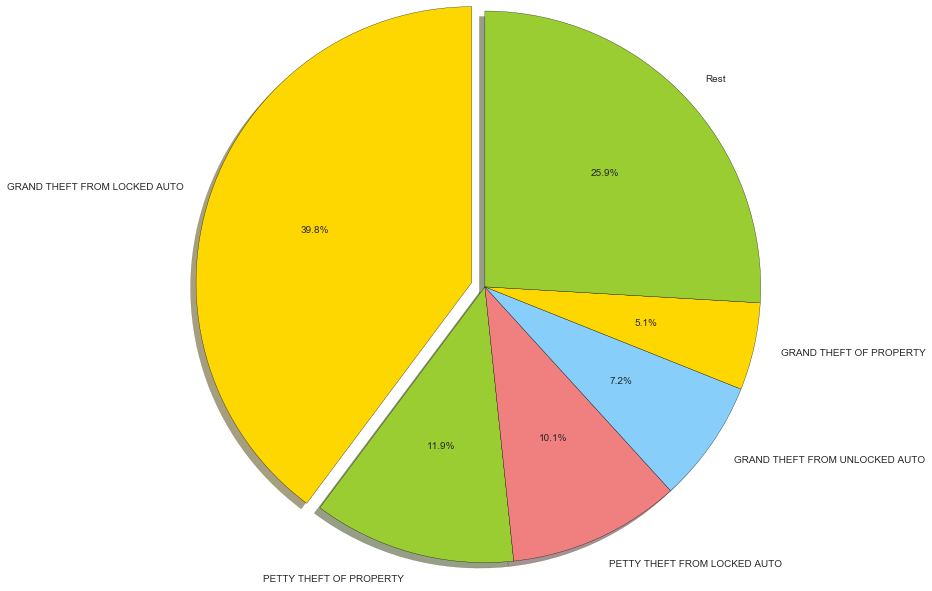

In [257]:
labels = top5_descript_in_top_cat['Descript']
data = top5_descript_in_top_cat['Count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' ]
explode = [0] * top5_descript_in_top_cat.num_rows()
explode[0] = 0.05

plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

___
## Have your stuff stolen from your car

Everyone who's ever lived in a major city most likely has his/her car broken in once or twice or more time.  The general intuition suggests that the time of the day and the location where you park have a lot to do with the chance of getting your car broken in.  Let's take a look at the date to see if that intuition holds.



In [258]:
def timegrp(time):
    breaks = ["00:00", "02:00", "04:00", "06:00", "08:00", "10:00", "12:00","14:00", "16:00", "18:00", "20:00", "22:00", "24:00"]
    
    if ((time >= breaks[0]) & (time<breaks[1])):
        return "00-02"
    elif ((time >= breaks[1]) & (time<breaks[2])):
        return "02-04"
    elif ((time >= breaks[2]) & (time<breaks[3])):
        return "04-06"
    elif ((time >= breaks[3]) & (time<breaks[4])):
        return "06-08"
    elif ((time >= breaks[4]) & (time<breaks[5])):
        return "08-10"
    elif ((time >= breaks[5]) & (time<breaks[6])):
        return "10-12"
    elif ((time >= breaks[6]) & (time<breaks[7])):
        return "12-14"
    elif ((time >= breaks[7]) & (time<breaks[8])):
        return "14-16"
    elif ((time >= breaks[8]) & (time<breaks[9])):
        return "16-18"
    elif ((time >= breaks[9]) & (time<breaks[10])):
        return "18-20"
    elif ((time >= breaks[10]) & (time<breaks[11])):
        return "20-22"
    else:
        return "20-24"
    
sf['Timegrp'] = sf['Time'].apply(timegrp)
temp=sf.groupby('Timegrp', agg.COUNT).sort('Timegrp')

# Create another column to index the Timegrp, which is needed later for the slider
def timegrp_index(time):
    
    if ((time == "00-02")):
        return 0
    elif ((time == "02-04")):
        return 1
    elif ((time == "04-06")):
        return 2
    elif ((time == "06-08")):
        return 3
    elif ((time == "08-10")):
        return 4
    elif ((time == "10-12")):
        return 5
    elif ((time == "12-14")):
        return 6
    elif ((time == "14-16")):
        return 7
    elif ((time == "16-18")):
        return 8
    elif ((time == "18-20")):
        return 9
    elif ((time == "20-22")):
        return 10
    else:
        return 11
    
sf['Timegrp_index'] = sf['Timegrp'].apply(timegrp_index)

In [31]:
key = ["GRAND THEFT FROM LOCKED AUTO", "PETTY THEFT FROM LOCKED AUTO"]
theft_auto = sf.filter_by(key, 'Descript')
theft_auto_resolve = theft_auto.groupby('Resolution', agg.COUNT).sort('Count', ascending=False)

In [348]:
# Here's a break down of the theft from auto by PdDistrict
#
theft_auto_pddistrict = theft_auto.groupby('PdDistrict', agg.COUNT).sort('Count', ascending=False)

In [261]:
# So, what is the "resolution" rate of a theft from a locked auto case?
#

theft_auto_resolve

Columns:
	Resolution	str
	Count	int

Rows: 7

Data:
+-------------------------------+-------+
|           Resolution          | Count |
+-------------------------------+-------+
|              NONE             |  4684 |
|         ARREST, BOOKED        |   32  |
|         JUVENILE CITED        |   1   |
| COMPLAINANT REFUSES TO PRO... |   1   |
|  PROSECUTED BY OUTSIDE AGENCY |   1   |
|           UNFOUNDED           |   1   |
|         ARREST, CITED         |   1   |
+-------------------------------+-------+
[7 rows x 2 columns]

In [262]:
theft_auto_size = theft_auto.groupby('Descript', agg.COUNT).sort('Count', ascending=False)

In [263]:
# What's the divide b/n Grand vs. Petty theft from locked autos?
# See http://www.avvo.com/legal-guides/ugc/whats-the-difference-between-grand-theft-and-petty-theft
#

theft_auto_size

Columns:
	Descript	str
	Count	int

Rows: 2

Data:
+------------------------------+-------+
|           Descript           | Count |
+------------------------------+-------+
| GRAND THEFT FROM LOCKED AUTO |  3766 |
| PETTY THEFT FROM LOCKED AUTO |  955  |
+------------------------------+-------+
[2 rows x 2 columns]

In [264]:
#by_age = trainSF_a.groupby(["Survived", "Age_grp"], {'count':gl.aggregate.COUNT()}).sort('Age_grp')

theft_auto_td = theft_auto.groupby(['PdDistrict', 'Timegrp'], agg.COUNT('Count')).sort('Count', ascending=False)
theft_auto_td

Columns:
	PdDistrict	str
	Timegrp	str
	Count	int

Rows: 120

Data:
+------------+---------+-------+
| PdDistrict | Timegrp | Count |
+------------+---------+-------+
|  SOUTHERN  |  18-20  |  292  |
|  SOUTHERN  |  20-22  |  221  |
|  SOUTHERN  |  20-24  |  178  |
|  NORTHERN  |  20-22  |  178  |
|  NORTHERN  |  18-20  |  163  |
|  CENTRAL   |  18-20  |  152  |
|  SOUTHERN  |  16-18  |  132  |
|  CENTRAL   |  20-22  |  127  |
|  SOUTHERN  |  12-14  |  106  |
|  CENTRAL   |  20-24  |  106  |
+------------+---------+-------+
[120 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [265]:
theft_auto_time = theft_auto.groupby(['Timegrp'], agg.COUNT('Count')).sort('Timegrp')
theft_auto_time

Columns:
	Timegrp	str
	Count	int

Rows: 12

Data:
+---------+-------+
| Timegrp | Count |
+---------+-------+
|  00-02  |  249  |
|  02-04  |   97  |
|  04-06  |   55  |
|  06-08  |  102  |
|  08-10  |  204  |
|  10-12  |  341  |
|  12-14  |  415  |
|  14-16  |  402  |
|  16-18  |  512  |
|  18-20  |  935  |
+---------+-------+
[12 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

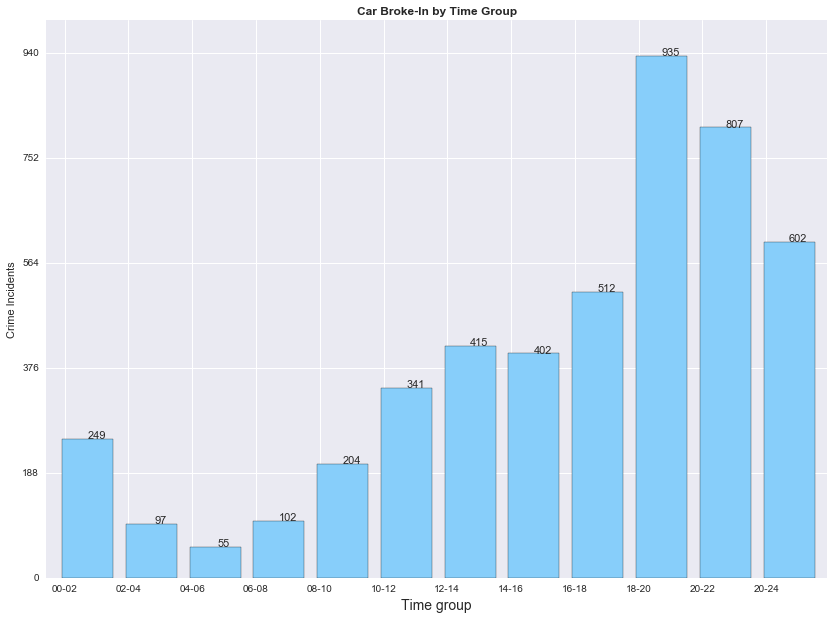

In [266]:
#crime_time = sf.groupby('Timegrp', agg.COUNT)
#
# Determine how wide each bar should appear.  A rough estimate w/ fudge factor
index = np.arange(len(theft_auto_time))
width = 1.0 / len(index)

# The Data used for this plot
crime_bar = plt.bar(index, theft_auto_time["Count"], color='lightskyblue')

# For the whole plot
plt.title('Car Broke-In by Time Group', fontsize=12, weight='bold')

# X-axis
plt.xlabel('Time group', fontsize=14)
plt.xticks(index + width/2., theft_auto_time["Timegrp"], fontsize=10)
plt.xlim(-.25, theft_auto_time.num_rows())

# Y-axis
plt.ylabel('Crime Incidents')
ymin = 0
ymax = round(theft_auto_time['Count'].max(), -1)
ytic = round((ymax-ymin) / 5., 0)
plt.yticks(np.arange(ymin,ymax+1,ytic))
#plt.grid(b=True, which='major', color='b', linestyle='-')

# Display the actual crime incident at the top of each bar

for ind in np.arange(len(theft_auto_time)):
    ind = int(ind)
    x = 0.5 + ind + width / 2.
    y = theft_auto_time['Count'][ind] + 0.25
    d = theft_auto_time['Count'][ind]
    plt.text(x, y, d, fontsize=11, ha='center')

Here, the number of thefts is at its highest during the hours of 16:00 - 20:00, which is surprising as one would assume car break-ins tend to happen at night.  But clearly the data suggest otherwise.  

One caveat worth noting here is that the "time" used here is the time the incident was reported to the police, not the actual time the break-in occurred.  So a break-in that occurred during the middle of the night most likely won't be noticed and reported by the owner until he/she reachs the car in the morning.  Similarly break-in during the day probably won't be noticed and reported until the owners reach the car, usually after getting off work, which is the most accessible explanation for the spike found at 18:00-20:00 hours.  

Regardless, the total number of incidents report from 08:00 to 20:00 is 2809, which is significantly higher than the 1612 reported from 20:00 to 08:00.

During the day, it is actually easier to observe what is in the car for the thieves.  

Now the question:

1. is there difference in terms of the PD District?

Let's see.

## Plot out the car vandalism in map

In [56]:
from __future__ import print_function

from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models.glyphs import Circle
from bokeh.models import (
    GMapPlot, Range1d, ColumnDataSource,
    PanTool, WheelZoomTool, BoxSelectTool,
    GMapOptions)
from bokeh.resources import INLINE
from bokeh.plotting import show, output_notebook
#from bokeh.util.browser import view

from bokeh.models.widgets import Panel, Tabs

from bokeh.palettes import Spectral7


In [73]:
map_options = GMapOptions(
    lat=37.78, lng=-122.444, 
    map_type="roadmap", 
    zoom=13, 
    styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

x_range = Range1d()
y_range = Range1d()

days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
i = 0

tabs = []
plots = []

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title="Car Break-ins on "+day+'s', plot_width=1000, plot_height=900
)


for day in days:
    temp = theft_auto[theft_auto['DayOfWeek'] == day]
    source = ColumnDataSource(
    data=dict(
        lat=temp['Y'],
        lon=temp['X']
    )
    )
    circle = Circle(x="lon", y="lat", size=3, fill_color=Spectral7[i], line_color=Spectral7[i])
    i = i+1
    plot.add_glyph(source, circle)
    
    #plots.append(plot)
    #tab = Panel(child=plots[i], title=day)
    #tabs.append(tab)

pan = PanTool()
wheel_zoom = WheelZoomTool()

plot.add_tools(pan, wheel_zoom)
show(plot)

# 4. Distribution of Assaults

Assault is a broad category, but it is generally sufficient (at least for this exercise) to associate general assaults with violent crime that tends to be a characteristics of a "rough" neighborhood.  Or is it?

1. we are going to extract incidents that fall under teh category of Assault
2. do a scatter plot against the longitude and lattidue
3. and roughly get a sense of where the assault charges tend to occur


In [21]:
assault = sf.filter_by('ASSAULT', 'Category')
assault_descript = assault['Descript']
assault_descript.unique()

dtype: str
Rows: 34
['ASSAULT ON A POLICE OFFICER WITH A DEADLY WEAPON', 'STALKING', 'ASSAULT', 'MAYHEM WITH A GUN', 'ATTEMPTED HOMICIDE WITH A KNIFE', 'AGGRAVATED ASSAULT WITH A GUN', 'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE', 'THREAT OR FORCE TO RESIST EXECUTIVE OFFICER', 'AGGRAVATED ASSAULT WITH A KNIFE', 'ASSAULT WITH CAUSTIC CHEMICALS', 'ATTEMPTED SIMPLE ASSAULT', 'TERRORIZING BY ARSON OR EXPLOSIVE DEVICE', 'MAYHEM WITH BODILY FORCE', 'CHILD ABUSE (PHYSICAL)', 'THREATS AGAINST LIFE', 'INFLICT INJURY ON COHABITEE', 'AGGRAVATED ASSAULT WITH BODILY FORCE', 'DISCHARGING IN GROSSLY NEGLIGENT MANNER', 'ATTEMPTED HOMICIDE WITH BODILY FORCE', 'MAYHEM WITH A DEADLY WEAPON', 'ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEMENT OR THEFT)', 'ATTEMPTED MAYHEM WITH A DEADLY WEAPON', 'UNLAWFUL DISSUADING/THREATENING OF A WITNESS', 'FALSE IMPRISONMENT', 'BATTERY', 'AGGRAVATED ASSAULT WITH A DEADLY WEAPON', 'BATTERY OF A POLICE OFFICER', 'ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON', 'ATTEMP

In [25]:
map_options = GMapOptions(
    lat=37.78, lng=-122.444, 
    map_type="roadmap", 
    zoom=13, 
    styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

x_range = Range1d()
y_range = Range1d()

assault_np = gl.SFrame.to_dataframe(assault)

source = ColumnDataSource(
    data=dict(
        lat=assault_np['Y'],
        lon=assault_np['X'], 
    )
)

plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title="Assaults", plot_width=1000, plot_height=900
    )

circle = Circle(x="lon", y="lat", size=2, fill_color="blue", line_color="blue")
plot.add_glyph(source, circle)

output_notebook()
show(plot)

BokehJS successfully loaded.

### Since San Francisco is know as a city of "7x7", meaning, a rough 7 miles by 7 miles square, although in reality it's really not that square, but for our purpose it's good enough.

So the assaults tend to occur in the northeast and south east of the city.  Unless a map is overlayed, it's difficult to judge the exact location.  But for now, it's safe to assume most of the assault charges occur near Downtown, Tenderloin, Russian Hills, Nob Hills, Chinatown.  While predominantly residential areas like Sunset, Richmond, Cole Valley, Castro, Noe Valley see relatively little activity in this regard.  Not very precise, but at least it confirms one's intuition about SF.

## What crimes are most likely to be reported together?

In [ ]:
assault.num_rows()

In [ ]:
time_stamp=assault['Time'].unique()

In [ ]:
locations = assault['Address'].unique()
dates = assault['Date'].unique()

In [ ]:
assault[assault['IncidntNum'] == 140734145]

In [ ]:
assault['dt'] = assault[assault['IncidntNum'] == 140734145]['Date'] + ' ' + assault[assault['IncidntNum'] == 140734145]['Time']

In [ ]:
assault['dt']=assault['Date']+' '+assault['Time']

In [ ]:
assault

In [ ]:
dt = assault['dt']
dt.unique()

In [ ]:
assault.num_rows()

In [ ]:
temp2=assault.groupby(['Date', 'Time', 'Location'], [agg.COUNT(), agg.CONCAT('IncidntNum')])
temp2 = temp2[temp2['Count'] >= 2]
temp2.sort('Count', ascending=False)

In [ ]:
temp2.groupby(['Count'], [agg.COUNT()])

## Which assault cases have the highest number of multiple citations

## Which assault scenarios are most likely to occur to gether?

In [74]:
narcs = sf.filter_by?


In [75]:
narcs = sf.filter_by('DRUG/NARCOTIC', 'Category', exclude=False)

In [78]:
narcs['Descript'].unique().sort()

dtype: str
Rows: 41
['FAILURE TO REGISTER AS NARCOTICS ADDICT', 'FORGE OR ALTER PRESCRIPTION', 'LOITERING WHERE NARCOTICS ARE SOLD/USED', 'MAINTAINING PREMISE WHERE NARCOTICS ARE SOLD/USED', 'PLANTING/CULTIVATING MARIJUANA', 'POSSESSION OF AMPHETAMINE FOR SALES', 'POSSESSION OF BASE/ROCK COCAINE', 'POSSESSION OF BASE/ROCK COCAINE FOR SALE', 'POSSESSION OF COCAINE', 'POSSESSION OF COCAINE FOR SALES', 'POSSESSION OF CONTROLLED SUBSTANCE', 'POSSESSION OF CONTROLLED SUBSTANCE FOR SALE', 'POSSESSION OF HALLUCINOGENIC', 'POSSESSION OF HALLUCINOGENIC FOR SALES', 'POSSESSION OF HEROIN', 'POSSESSION OF HEROIN FOR SALES', 'POSSESSION OF MARIJUANA', 'POSSESSION OF MARIJUANA FOR SALES', 'POSSESSION OF METH-AMPHETAMINE', 'POSSESSION OF METH-AMPHETAMINE FOR SALE', 'POSSESSION OF METHADONE', 'POSSESSION OF METHADONE FOR SALES', 'POSSESSION OF NARCOTICS PARAPHERNALIA', 'POSSESSION OF OPIATES', 'POSSESSION OF OPIATES FOR SALES', 'POSSESSION OF OPIUM DERIVATIVE', 'SALE OF BARBITUATES', 'SALE OF BASE/ROC

In [105]:
import re
prog = re.compile('.*SALE OF.*')
narc_sales = narcs[narcs['Descript'].apply(lambda x: 1 if prog.match(x) else 0)]

prog = re.compile('.*FOR SALES.*')
narc_poss_sales = narcs[narcs['Descript'].apply(lambda x: 1 if prog.match(x) else 0)]

In [108]:
narc_sales['Descript'].unique()
narc_sales.num_rows()

114

In [109]:
narc_poss_sales['Descript'].unique()
narc_poss_sales.num_rows()

98